 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [361]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [362]:
# Reading whale returns
whale_returns_csv = Path ("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returnsdf= pd.read_csv(whale_returns_csv)
whale_returnsdf.sample()
whale_returnsdf.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [363]:
# Count nulls
whale_returnsdf.count()
whale_returnsdf.isnull().mean() * 100
whale_returnsdf.isnull().sum()

# YOUR CODE HERE

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [364]:
# Drop nulls
# YOUR CODE HERE
whale_returnsdf.dropna(inplace=True)
whale_returnsdf.sample(5)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
340,2016-06-28,0.013727,0.022680,0.013722,0.017600
547,2017-04-18,0.000303,-0.006847,0.004907,-0.001164
8,2015-03-12,0.008265,0.010272,0.013117,0.010801
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
438,2016-11-11,0.000000,0.000000,0.000000,0.000000


In [365]:
whale_returnsdf.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [366]:
whale_returnsdf.set_index(pd.to_datetime(whale_returnsdf['Date'], infer_datetime_format = True),inplace=True)
whale_returnsdf.drop(columns=['Date'], inplace = True)
whale_returnsdf.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [367]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df.dtypes
# YOUR CODE HERE

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [368]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [369]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df.dropna(inplace=True)
algo_returns_df.sample(5)

,Date,Algo 1,Algo 2
695,2017-03-01,0.001702,0.012971
1215,2019-03-26,0.005455,0.005614
823,2017-08-31,-0.000528,0.006579
909,2018-01-04,-0.000914,0.004294
579,2016-09-13,-0.002606,-0.017934


In [370]:
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [371]:
algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format = True),inplace=True)
algo_returns_df.drop(columns=['Date'], inplace = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [372]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv)

In [373]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [374]:
# Fix Data Types
# YOUR CODE HERE
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df["Close"] = sp500_df["Close"].astype('float')
sp500_df.dtypes


Date      object
Close    float64
dtype: object

In [375]:
sp500_df.describe(include='all')
sp500_df.head()


,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06


In [376]:

sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format = True),inplace=True)
sp500_df.drop(columns=['Date'], inplace = True)
sp500_df = sp500_df.sort_index(ascending='True')
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [377]:
daily_returns_sp500 = (sp500_df - sp500_df.shift(1))/ sp500_df.shift(1)
daily_returns_sp500.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [378]:
# Drop nulls
# YOUR CODE HERE
daily_returns_sp500.dropna(inplace=True)

In [379]:
# Rename Column
# YOUR CODE HERE
daily_returns_sp500.columns = ['SP500']
daily_returns_sp500.head()                                           

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


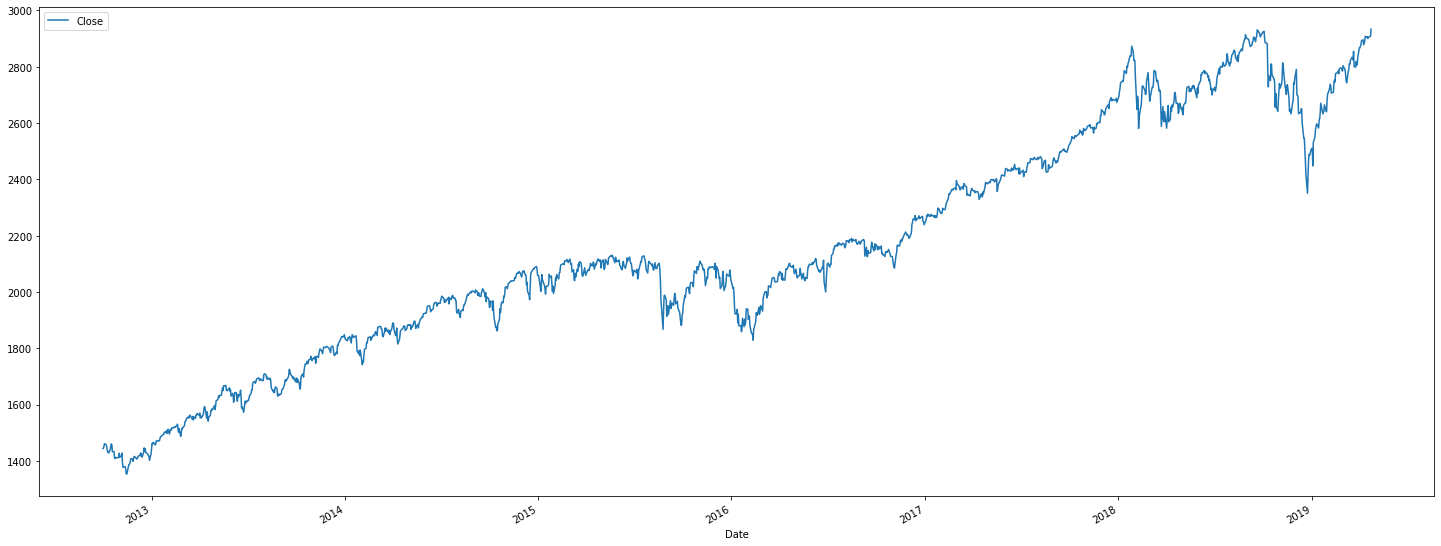

In [380]:
sp500_df.plot(figsize=(25,10))

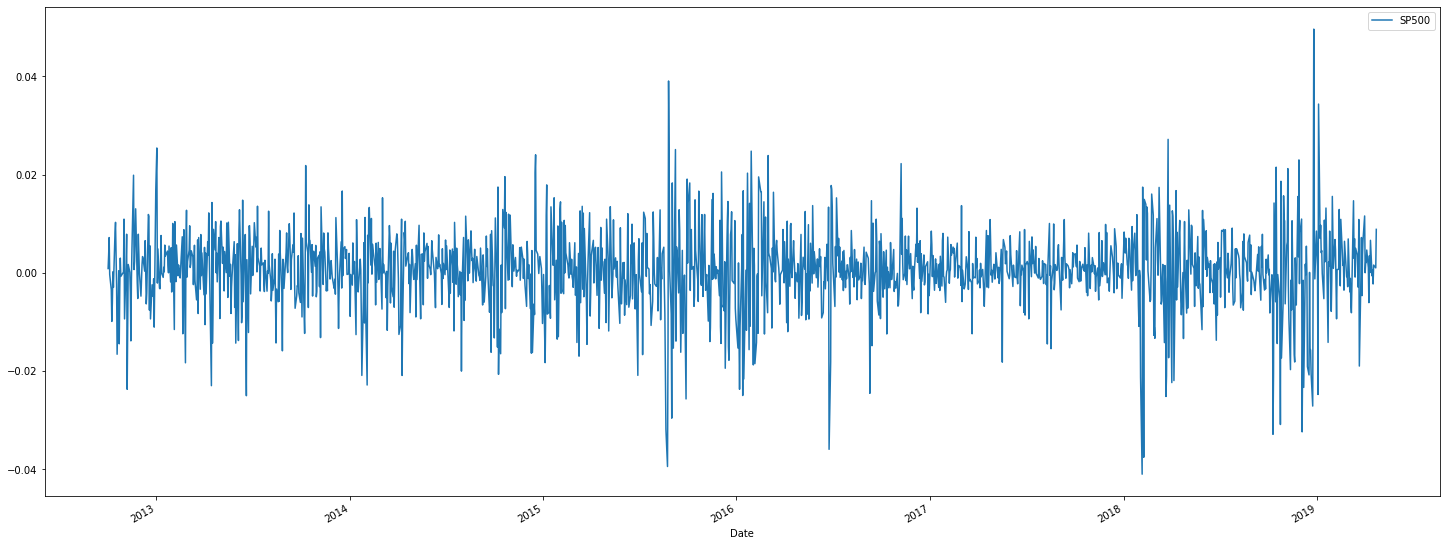

In [381]:
daily_returns_sp500.plot(figsize=(25,10))

## Combine Whale, Algorithmic, and S&P 500 Returns

In [382]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HER
combined_df = pd.concat([daily_returns_sp500, algo_returns_df, whale_returnsdf], axis = 'columns', join='inner')

combined_df.head()

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

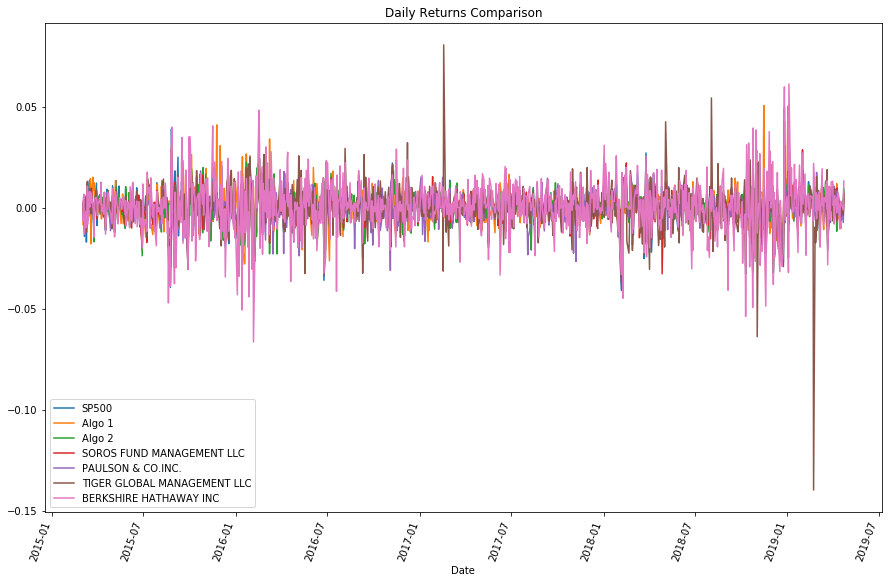

In [383]:
# Plot daily returns
# YOUR CODE HERE
for i, col in enumerate(combined_df.columns):
    combined_df[col].plot(figsize=(15,10))

from matplotlib import pyplot as plt
plt.title('Daily Returns Comparison')
plt.xticks(rotation=70)
plt.legend(combined_df.columns)


In [384]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,0.995461,0.998058,0.999051,0.998734,0.995019,0.999504,0.993431
2015-03-04,0.991093,0.989486,1.001464,1.000962,0.998245,0.996972,0.997617
2015-03-05,0.992278,0.988541,1.005794,1.004981,1.002314,0.999319,1.004327
2015-03-06,0.978214,0.983641,0.994267,0.997037,0.998731,0.990844,0.991172
2015-03-09,0.982072,0.978283,0.995563,0.997617,1.002951,0.996633,0.989534


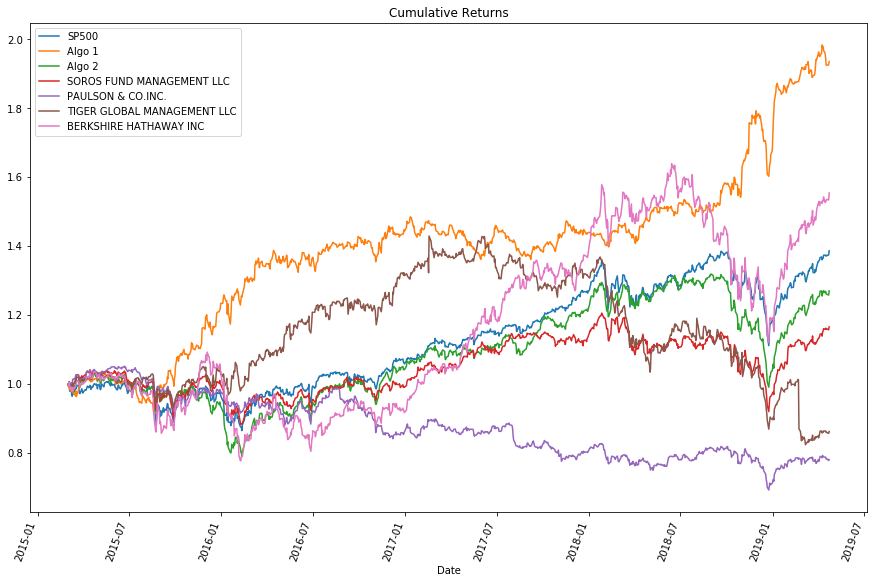

In [385]:
for i, col in enumerate(cumulative_returns.columns):
    cumulative_returns[col].plot(figsize=(15,10))
    
plt.title('Cumulative Returns')
plt.xticks(rotation=70)
plt.legend(combined_df.columns)

# Performance Analysis
Berkshire Hathaway and the algorithmic portfolio 1 outperform the market.

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

In [386]:
# Box plot to visually show risk
# YOUR CODE HERE

In [387]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = combined_df.std()
daily_std

SP500                          0.008554
Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [388]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

BERKSHIRE HATHAWAY INC AND TIGER GLOBAL MANAGEMENT HAVE ARE "RISKIER" THAN THE SP500, ALGO 2, SOROS FUND AND THE PAULSON PORTFOLIOS HAVE A SMALLER SPREAD. SEE BOX TABLE.

In [389]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()


BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
dtype: float64

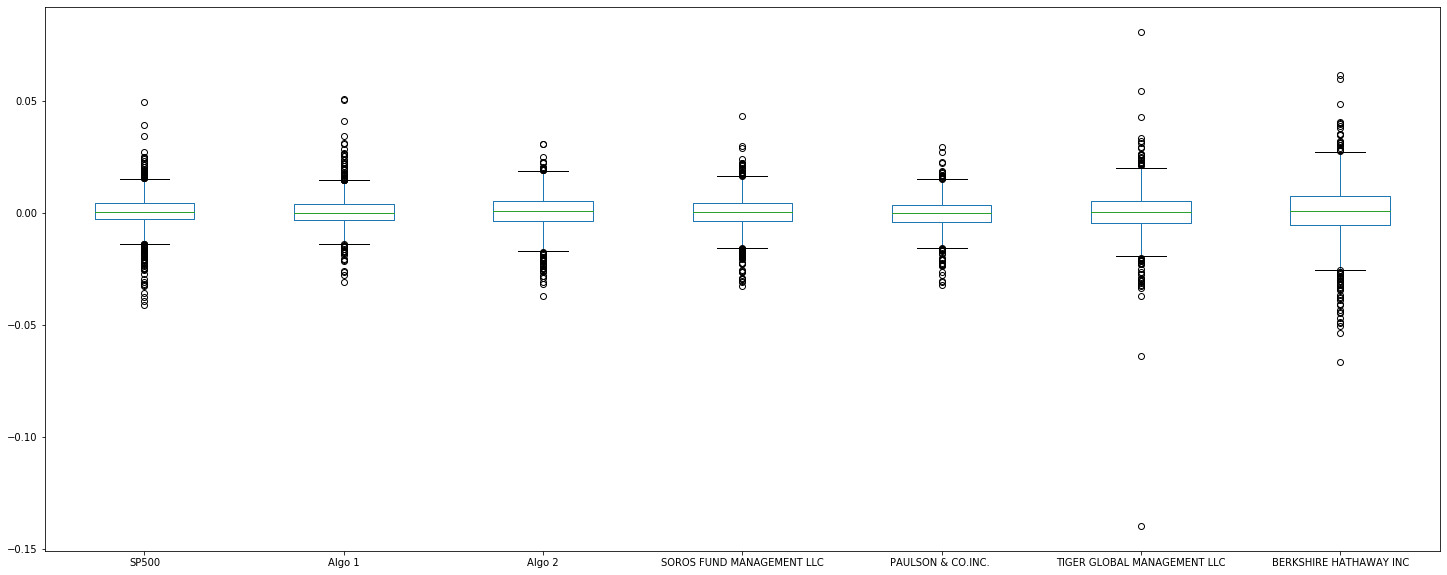

In [390]:
combined_df.plot.box(figsize=(25,10))

Berkshire and AL

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

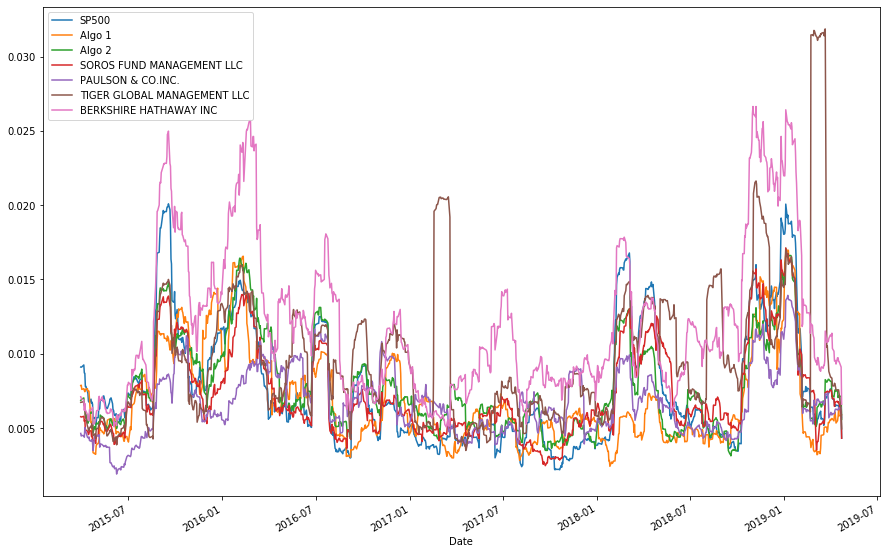

In [391]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
rolling_std =combined_df.rolling(window=21).std()
rolling_std.plot(figsize=(15,10))

In [392]:
# Correlation
# YOUR CODE HERE
correlation = combined_df.corr()
correlation

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SP500,1.000000,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371
Algo 1,0.279494,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033
Algo 2,0.858764,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082
SOROS FUND MANAGEMENT LLC,0.837864,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360
PAULSON & CO.INC.,0.669732,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623
TIGER GLOBAL MANAGEMENT LLC,0.623946,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423
BERKSHIRE HATHAWAY INC,0.751371,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000


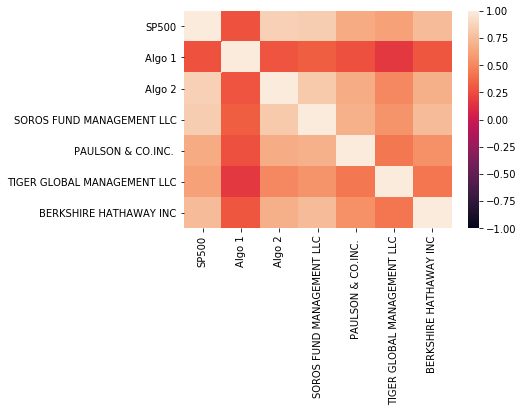

In [393]:
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

The Algo 2, Soros Fund and Berkshire Hathaway portfolios have the stronger correlation with the market.

In [394]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
# Calculate covariance of all daily returns of BERKSHIRE HATHAWAY INC vs. S&P 500
covariance = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['SP500'])
covariance

8.302834941861692e-05

In [395]:
# Calculate variance of all daily returns S&P 500
variance = combined_df['SP500'].var()
variance

7.31663242464871e-05

In [396]:
bhw_beta = covariance / variance
bhw_beta

1.134789129749173

Beta of Berkshire Hathaway is positive greater than 1. Beta is the slope of the linear regression, the slope of the best-fitting line through the points. It means that BHA has a exposure to the maeket of 1.13, or in other words if the market goes up by one, BHA is likely to go up by 1.34 fits the  

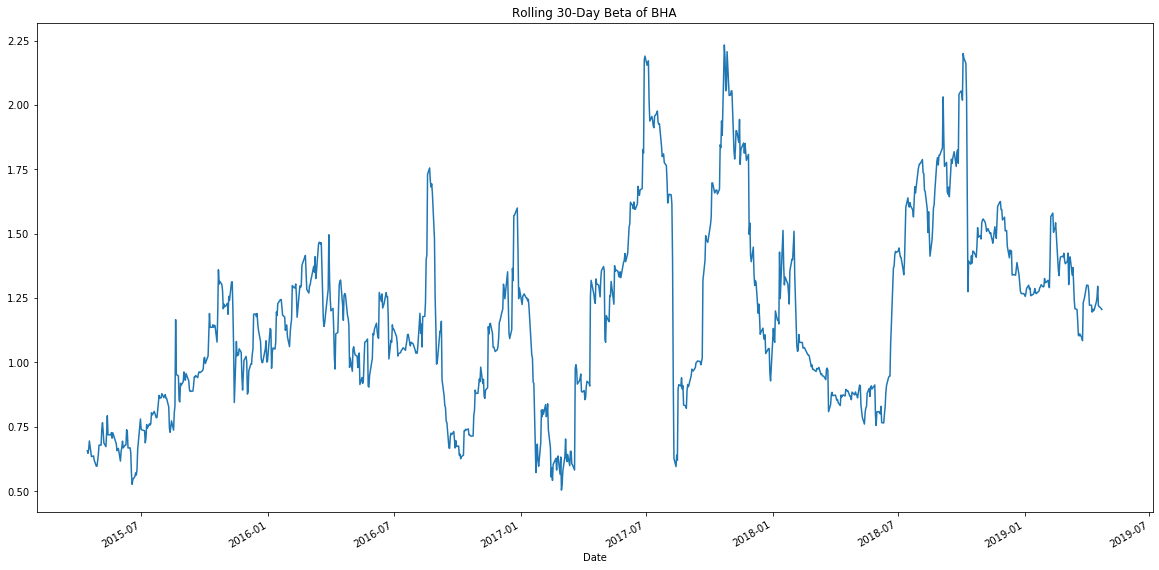

In [397]:
rolling_beta = (combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(combined_df['SP500']))/(combined_df['SP500'].rolling(window=30).var())
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of BHA')

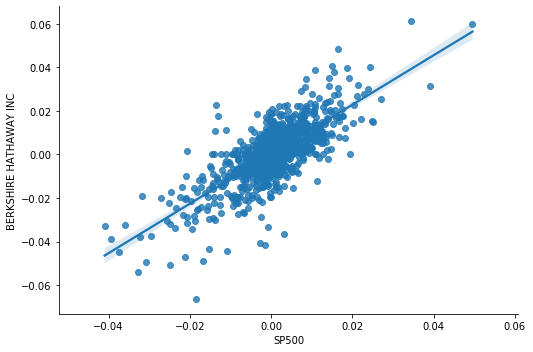

In [398]:
sns.lmplot(x='SP500', y='BERKSHIRE HATHAWAY INC', data=combined_df, aspect=1.5, fit_reg=True)

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

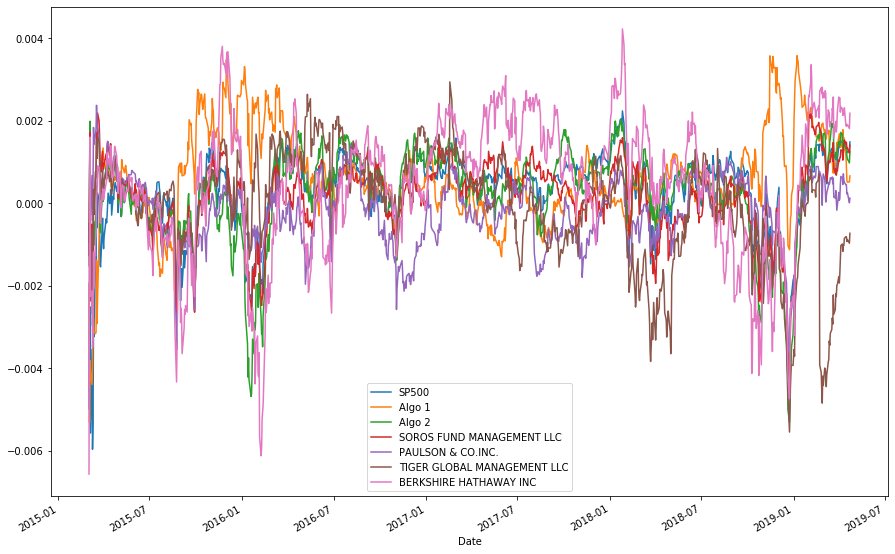

In [402]:
# (OPTIONAL) YOUR CODE HERE
exp_weighted_avg = combined_df.ewm(halflife=21).mean()
exp_weighted_avg.plot(figsize=(15,10))

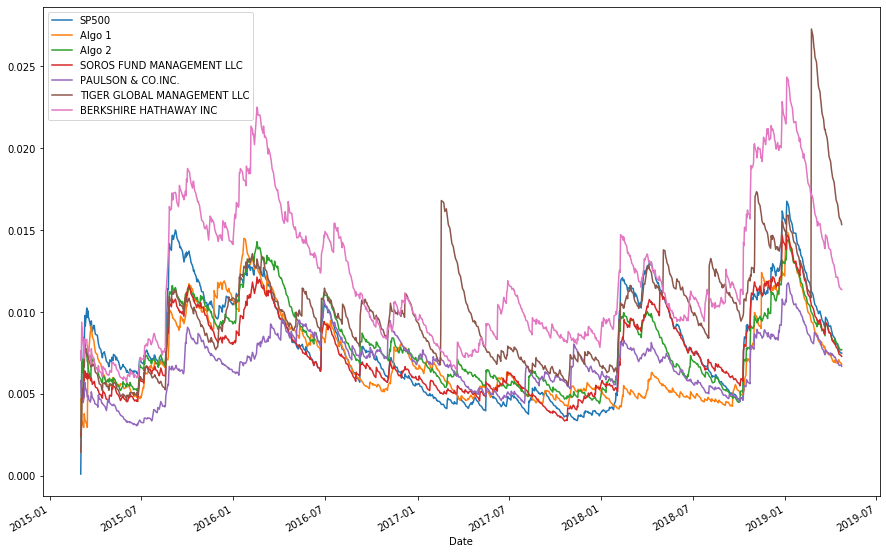

In [403]:
exp_weighted_std = combined_df.ewm(halflife=21).std()
exp_weighted_std.plot(figsize=(15,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [404]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SP500                          0.648267
Algo 1                         1.378648
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
dtype: float64

plot() these sharpe ratios using a barplot.
On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

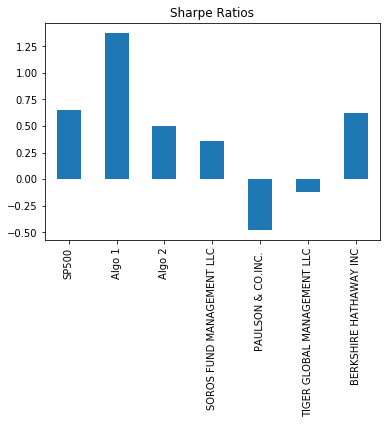

In [405]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

Algorithmic strateg 1 outperforme the SP500 and the whales portfolios. For every unit of risk it has gained higher annualized returns in the period of study. In contrast algorithmic strategy 2 has not outperformed the market nor Berkshire Hathaway when factoring risk to the returns. 

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [406]:
# Read the first stock
# YOUR CODE HERE
amzn_csv = Path ("Resources/AMZN.csv")

amzn_df= pd.read_csv(amzn_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
amzn_df.sort_index(inplace=True)
amzn_df.dtypes

Close    float64
dtype: object

In [407]:
amzn_df.head()

,Close
Date,
2019-04-17 16:00:00,1864.82
2019-04-18 16:00:00,1861.69
2019-04-22 16:00:00,1887.31
2019-04-23 16:00:00,1923.77
2019-04-24 16:00:00,1901.75


In [408]:
# Read the second stock
# YOUR CODE HERE
goog_csv = Path ("Resources/GOOG.csv")

goog_df= pd.read_csv(goog_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
goog_df.sort_index(inplace=True)
goog_df.dtypes

Close    float64
dtype: object

In [409]:
goog_df.head()

,Close
Date,
2019-04-17 16:00:00,1236.34
2019-04-18 16:00:00,1236.37
2019-04-22 16:00:00,1248.84
2019-04-23 16:00:00,1264.55
2019-04-24 16:00:00,1256.00


In [410]:
# Read the third stock
# YOUR CODE HERE
tsla_csv = Path ("Resources/TSLA.csv")

tsla_df= pd.read_csv(tsla_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
tsla_df.sort_index(inplace=True)
tsla_df.dtypes

Close    float64
dtype: object

In [411]:
tsla_df.head()

,Close
Date,
2019-04-17 16:00:00,271.23
2019-04-18 16:00:00,273.26
2019-04-22 16:00:00,262.75
2019-04-23 16:00:00,263.90
2019-04-24 16:00:00,258.66


In [412]:

nflx_csv = Path ("Resources/NFLX.csv")

nflx_df= pd.read_csv(nflx_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
nflx_df.sort_index(inplace=True)
nflx_df.dtypes

Close    float64
dtype: object

In [413]:
nflx_df.head()

,Close
Date,
2019-04-17 16:00:00,354.74
2019-04-18 16:00:00,360.35
2019-04-22 16:00:00,377.34
2019-04-23 16:00:00,381.89
2019-04-24 16:00:00,374.23


In [414]:
cost_csv = Path ("Resources/COST.csv")

cost_df= pd.read_csv(cost_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
cost_df.sort_index(inplace=True)
cost_df.dtypes

Close    float64
dtype: object

In [415]:
cost_df.head()

,Close
Date,
2019-04-17 16:00:00,245.56
2019-04-18 16:00:00,245.81
2019-04-22 16:00:00,243.42
2019-04-23 16:00:00,245.58
2019-04-24 16:00:00,247.96


In [416]:
cost_df.tail()

,Close
Date,
2020-04-09 16:00:00,300.01
2020-04-13 16:00:00,299.62
2020-04-14 16:00:00,314.14
2020-04-15 16:00:00,310.27
2020-04-16 16:00:00,321.56


In [417]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
all_prices =  pd.concat([amzn_df, goog_df, tsla_df, nflx_df, cost_df], axis="columns", join="inner")
all_prices.columns = ['AMZN', 'GOOG', 'TSLA', 'NFLX', 'COST']
all_prices.head()

,AMZN,GOOG,TSLA,NFLX,COST
Date,,,,,
2019-04-17 16:00:00,1864.82,1236.34,271.23,354.74,245.56
2019-04-18 16:00:00,1861.69,1236.37,273.26,360.35,245.81
2019-04-22 16:00:00,1887.31,1248.84,262.75,377.34,243.42
2019-04-23 16:00:00,1923.77,1264.55,263.90,381.89,245.58
2019-04-24 16:00:00,1901.75,1256.00,258.66,374.23,247.96


In [418]:
all_returns = all_prices.pct_change()
all_returns.head()

,AMZN,GOOG,TSLA,NFLX,COST
Date,,,,,
2019-04-17 16:00:00,NaN,NaN,NaN,NaN,NaN
2019-04-18 16:00:00,-0.001678,0.000024,0.007484,0.015814,0.001018
2019-04-22 16:00:00,0.013762,0.010086,-0.038462,0.047149,-0.009723
2019-04-23 16:00:00,0.019319,0.012580,0.004377,0.012058,0.008874
2019-04-24 16:00:00,-0.011446,-0.006761,-0.019856,-0.020058,0.009691


In [419]:
# Drop Nulls
# YOUR CODE HERE
all_returns.dropna(inplace=True)


In [420]:
all_returns.isnull().sum()

AMZN    0
GOOG    0
TSLA    0
NFLX    0
COST    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [421]:
# Calculate weighted portfolio returns
weights = [1/5, 1/5, 1/5,1/5,1/5]
# YOUR CODE HERE
portfolio_returns = all_returns.dot(weights)
portfolio_returns.head()

Date
2019-04-18 16:00:00    0.004533
2019-04-22 16:00:00    0.004562
2019-04-23 16:00:00    0.011441
2019-04-24 16:00:00   -0.009686
2019-04-25 16:00:00   -0.012346
dtype: float64

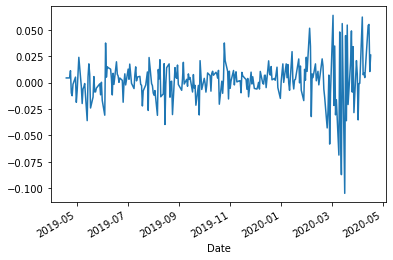

In [422]:
portfolio_returns.plot()

In [423]:
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.head()

Date
2019-04-18 16:00:00    0.004533
2019-04-22 16:00:00    0.009116
2019-04-23 16:00:00    0.020661
2019-04-24 16:00:00    0.010775
2019-04-25 16:00:00   -0.001704
dtype: float64

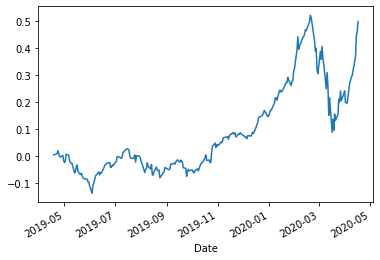

In [424]:
cumulative_returns.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [425]:
# YOUR CODE HERE
all_returns['Portfolio'] = portfolio_returns
all_returns.head()

,AMZN,GOOG,TSLA,NFLX,COST,Portfolio
Date,,,,,,
2019-04-18 16:00:00,-0.001678,0.000024,0.007484,0.015814,0.001018,0.004533
2019-04-22 16:00:00,0.013762,0.010086,-0.038462,0.047149,-0.009723,0.004562
2019-04-23 16:00:00,0.019319,0.012580,0.004377,0.012058,0.008874,0.011441
2019-04-24 16:00:00,-0.011446,-0.006761,-0.019856,-0.020058,0.009691,-0.009686
2019-04-25 16:00:00,0.000263,0.005932,-0.042643,-0.015766,-0.009518,-0.012346


In [426]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [427]:
# Risk
# YOUR CODE HERE
volatility = all_returns.std() * np.sqrt(252)
volatility

AMZN         0.303006
GOOG         0.358091
TSLA         0.752023
NFLX         0.414374
COST         0.279663
Portfolio    0.324203
dtype: float64

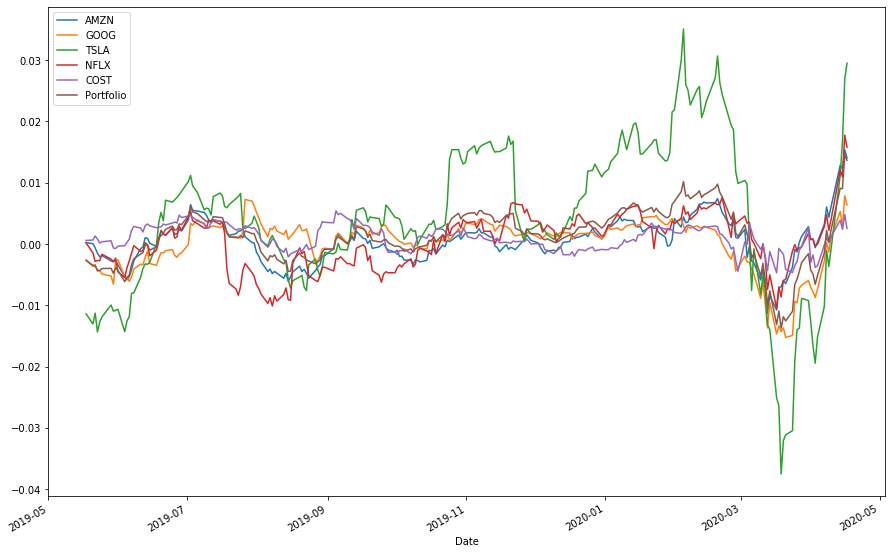

In [428]:
all_returns.rolling(window=21).mean().plot(figsize=(15,10))

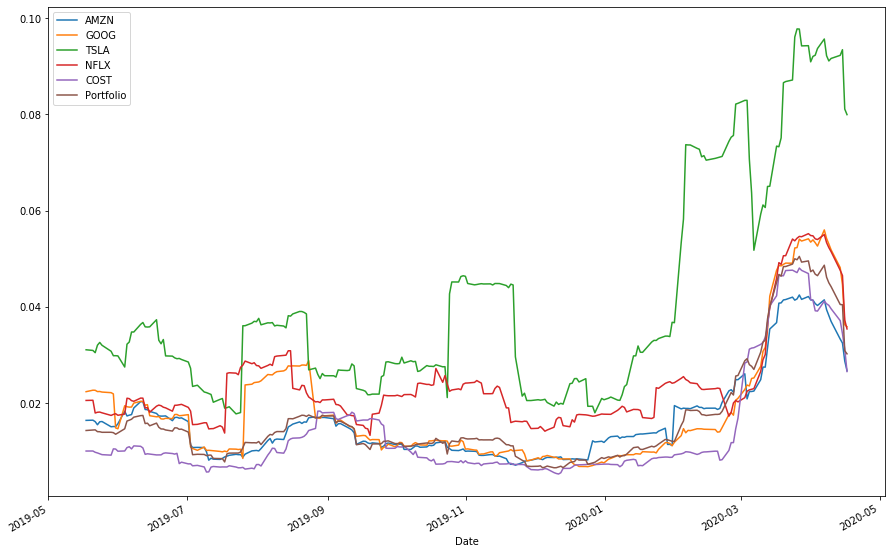

In [429]:
# Rolling
# YOUR CODE HERE
rolling_portfolio = all_returns.rolling(window=21).std()
rolling_portfolio.plot(figsize=(15,10))

In [430]:
sp_500_csv = Path ("Resources/SP_500.csv")
sp_500_df= pd.read_csv(sp_500_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_500_df.sort_index(inplace=True)
daily_returns_sp_500 = sp_500_df.pct_change()
daily_returns_sp_500.dropna(inplace=True)
daily_returns_sp_500.head()

,Close
Date,
2019-04-18 16:00:00,0.001579
2019-04-22 16:00:00,0.001012
2019-04-23 16:00:00,0.008841
2019-04-24 16:00:00,-0.002192
2019-04-25 16:00:00,-0.000369


In [431]:
daily_returns_sp_500.tail()

,Close
Date,
2020-04-09 16:00:00,0.014487
2020-04-13 16:00:00,-0.010105
2020-04-14 16:00:00,0.030573
2020-04-15 16:00:00,-0.022030
2020-04-16 16:00:00,0.005817


In [432]:
all_variance = all_returns.var()
all_variance

AMZN         0.000364
GOOG         0.000509
TSLA         0.002244
NFLX         0.000681
COST         0.000310
Portfolio    0.000417
dtype: float64

In [433]:
covariance_portfolio= all_returns['Portfolio'].cov(daily_returns_sp_500['Close'])
covariance_portfolio

0.0003282308313942876

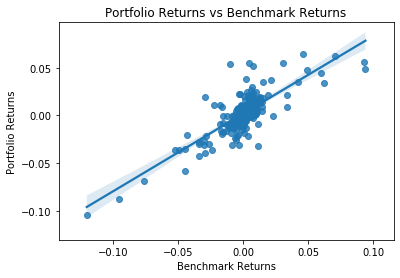

In [434]:
sns.regplot(daily_returns_sp_500.values,all_returns['Portfolio'].values)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()

In [435]:
from scipy import stats

In [436]:
(beta_portfolio, alpha) = stats.linregress(daily_returns_sp_500['Close'].values,
                all_returns['Portfolio'].values)[0:2]
                
print("The portfolio beta is",round(beta_portfolio,4))

The portfolio beta is 0.8168


In [437]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios

AMZN         0.998044
GOOG         0.239833
TSLA         1.726562
NFLX         0.725309
COST         1.105822
Portfolio    1.416716
dtype: float64

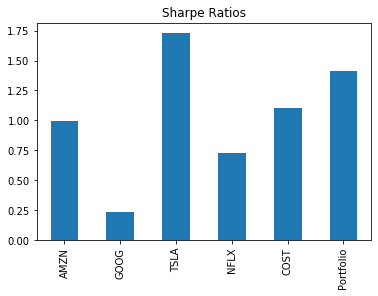

In [438]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

My portfolio was outperformed by TSLA.

## Include correlation analysis to determine which stocks (if any) are correlated

In [439]:
# YOUR CODE HERE

In [440]:
correlation_portfolio= all_returns.corr()
correlation_portfolio

,AMZN,GOOG,TSLA,NFLX,COST,Portfolio
AMZN,1.000000,0.688058,0.424695,0.665630,0.630031,0.814793
GOOG,0.688058,1.000000,0.429010,0.584913,0.610207,0.803341
TSLA,0.424695,0.429010,1.000000,0.376138,0.246545,0.776764
NFLX,0.665630,0.584913,0.376138,1.000000,0.476383,0.765945
COST,0.630031,0.610207,0.246545,0.476383,1.000000,0.661243
Portfolio,0.814793,0.803341,0.776764,0.765945,0.661243,1.000000


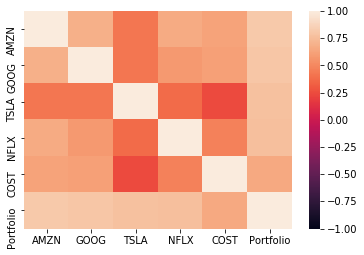

In [441]:
import seaborn as sns
sns.heatmap(correlation_portfolio, vmin=-1, vmax=1)